In [ ]:
# LOAD FUNCTIONS
%run useful_functions.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_t.head()

,ID,Codi_Districte_Educatiu,Nom_Districte_Educatiu,Curs,Sexe,Llar_BCN,ERFDbllp,Edat,amb_qui_vius,familia_altra_casa,...,t_deures,t_tv,t_esport,t_familia,t_airelliure,t_xarxes,t_videojocs,t_resrepos,d_drets,d_convencio
0,1,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,Every day,5 or 6 days a week,5 or 6 days a week,5 or 6 days a week,3 or 4 days a week,5 or 6 days a week,One day a month,1 or 2 days a week,Yes,Yes
1,2,8,Nou Barris,6è,Boy,Yes,Intermediate income neighborhoods,11,I live with my family,Yes,...,Every day,Every day,1 or 2 days a week,One day a month,One day a month,3 or 4 days a week,1 or 2 days a week,1 or 2 days a week,Yes,I'm not sure
2,3,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,Every day,5 or 6 days a week,Every day,Every day,3 or 4 days a week,3 or 4 days a week,1 or 2 days a week,Every day,I'm not sure,Yes
3,4,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,3 or 4 days a week,5 or 6 days a week,Every day,5 or 6 days a week,3 or 4 days a week,Every day,1 or 2 days a week,3 or 4 days a week,Yes,Yes
4,5,8,Nou Barris,6è,Girl,Yes,Low-income neighborhoods,11,I live with my family,No,...,Every day,5 or 6 days a week,One day a month,3 or 4 days a week,3 or 4 days a week,1 or 2 days a week,One day a month,Never or almost never,Yes,Yes


## 1. Find relevant columns manually and filter for those:

In [ ]:
# Relevant columns
rel_col = ['Nom_Districte_Educatiu', 'Codi_Districte_Educatiu', 'ERFDbllp',  # District name, district number, Income in neighbourhood
           'amb_qui_vius', 'familia_altra_casa', 'mare', 'pare',             # Who do you live with, family another house, mom , dad
           'parella_mare', 'segona_mare', 'parella_pare', 'segon_pare',      # Parallel mom?, second mom, parallel dad?, second dad
           'germans', 'avis', 'altres_infants', 'altres_adults',             # Brothers (siblings?), grandparents, other children, other adults
           'animals', 'germans_mateixa_llar', 'avis_mateixa_llar',           # animals, siblings at home, grandparents at home
           's_familia', 'f_preocupacio', 'f_suport', 'f_bejunts',            # Satisfied with family (10 = best), people worried about me, support for problems, great time together 
           'f_seguretat', 'f_escolta', 'f_llibertat']                        # feel safe at home, parents listen to me, parents make sure i have freedom

In [ ]:
family_df = df_t.copy()[rel_col]
# family_df.head()

## 2. Basic statistics

#### Summary of finding so far:

Not all columns is of interest. Columns such as `amb_qui_vius` have very few entrees that aren't `I live with my family`. 

So far, columns of interest could me `mare`, `pare`, `familia_altra_casa` (indicator if parents are seperated/divorced), `animals` (animals could be interesting, as to see if kids with animals are happier).


### 2.1 Distribution of income levels

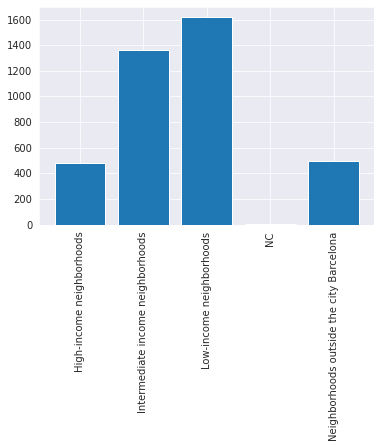

In [ ]:
income = family_df.groupby(['ERFDbllp']).count()['mare']

x = income.index.values
y = income.values

plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

### 2.2 Family info

#### 2.2.1 Mom, dad, animal, divorced

In [ ]:
who_live = family_df.groupby(['amb_qui_vius']).count()['mare']

# Doesn't make sense to plot
who_live

amb_qui_vius
I live in a boys and girls residence       4
I live with a host family                 15
I live with my family                   3929
NC                                        14
Name: mare, dtype: int64

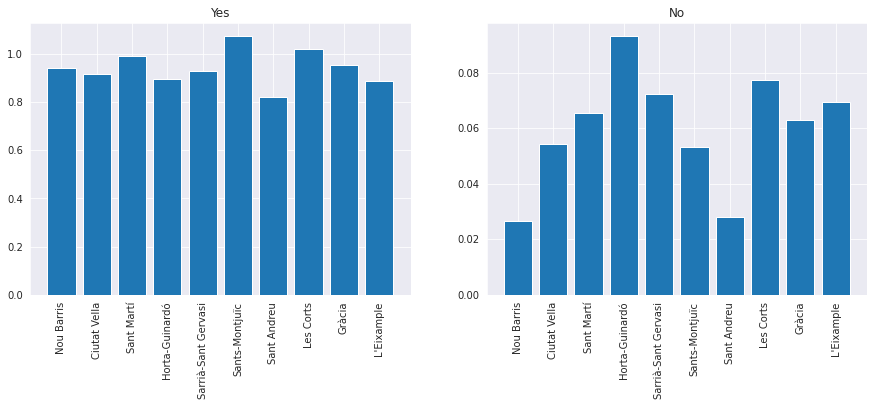

In [ ]:
mare = family_df.groupby(['Nom_Districte_Educatiu','mare']).count()['pare']
plot_yes_no('mare')

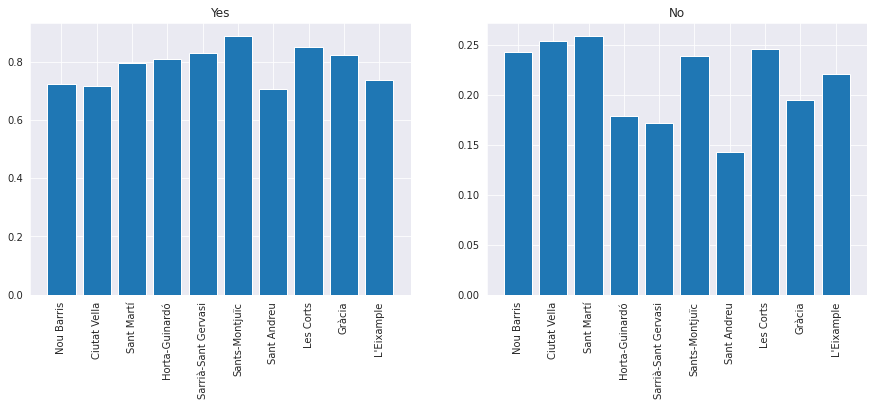

In [ ]:
plot_yes_no('pare')

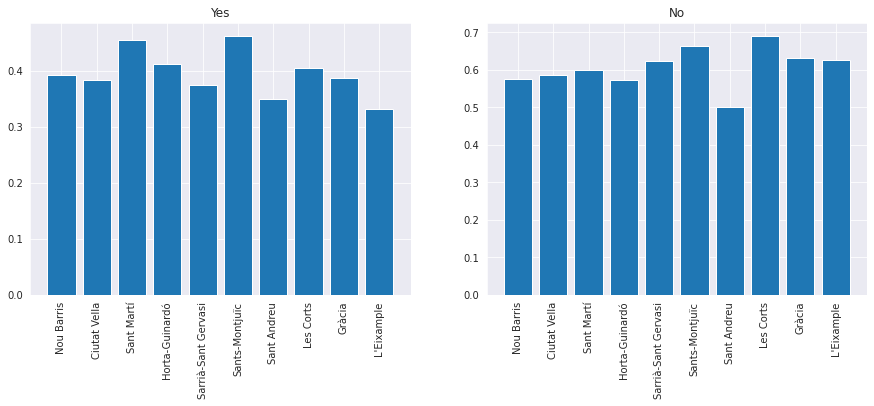

In [ ]:
plot_yes_no('animals')

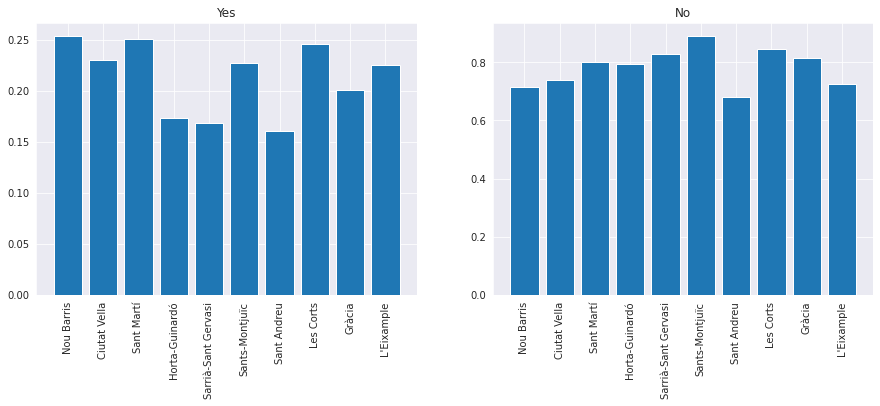

In [ ]:
plot_yes_no('familia_altra_casa')

#### 2.2.2 Question 7, question about home

Plots regarding question 7 in block 2.

Function that takes a question and display a grouped bar plot of each answer in every district in percent.

In [ ]:
def plot_question7(question: str):

    choices = ['People agree', 'Little agreement', 'More or less agree', 'Quite okay',  'Totally agree', 'I do not know', 'NC']  # Same order as in the question
    question_df = df_t[['Nom_Districte_Educatiu', question]]  # Only interested in district and question

    districts = question_df['Nom_Districte_Educatiu'].unique()
    district_count = question_df.groupby('Nom_Districte_Educatiu').count()[question]

    count_dict = pd.Series(district_count.values,index=district_count.index).to_dict()

    # set width of bars
    barWidth = 0.15

    bars = {}
    for c in choices:
        counts = []
        choice_filter = (question_df[question] == c)  # filter for choice

        for dis in districts:
            district_filter = (question_df['Nom_Districte_Educatiu'] == dis)  # filter for district
            val = question_df[district_filter & choice_filter].count().values[0]
            counts.append(val/count_dict[dis])
        
        bars[c] = counts
    
    # Set position of bar on X axis
    position = {}
    for i, c in enumerate(choices):
        if position.keys():
            idx = list(position.keys())[i-1]
            position[c] = [x + barWidth for x in position[idx]]
        else:
            position[c] = np.arange(len(bars[c]))   

    
    plt.figure(figsize=(10, 7))

    # Make the plot
    for c in choices:
        plt.bar(position[c], bars[c], width=barWidth, edgecolor='white', label=c)

    # Add xticks on the middle of the group bars
    idx = list(bars.keys())[0]
    plt.xticks([r + barWidth for r in range(len(bars[idx]))], districts, rotation=90)
    
    # Create legend & Show graphic
    plt.legend()
    plt.show()
    

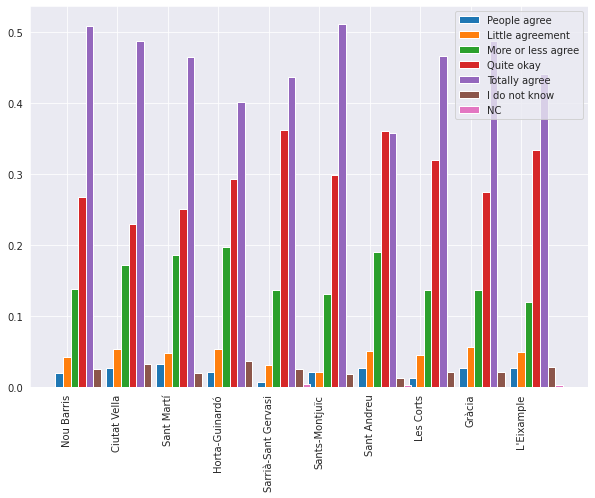

In [ ]:
#'f_preocupacio', 'f_suport', 'f_bejunts', 'f_seguretat', 'f_escolta', 'f_llibertat'
# 'Nou Barris', 'Ciutat Vella', 'Sant Martí', 'Horta-Guinardó', 'Sarrià-Sant Gervasi', 'Sants-Montjuïc', 'Sant Andreu', 'Les Corts', 'Gràcia', "L'Eixample"

plot_question7('f_llibertat')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5cb1a2c0-2f56-40d6-8008-fedeaf8b6a17' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>